### Notebook to investigate parenteral opioid dispensing trends
A notebook using [English Prescribing Data](https://www.nhsbsa.nhs.uk/prescription-data/prescribing-data/english-prescribing-data-epd) to investigate trends in parenteral opioid dispensing data.
- [Imports](#IMPORTS)
- [Standard functions](#FUNCTIONS)
- [OpenPrescribing data extract](#OPBNF)
- [Item plots](#CHARTS)

<a id='IMPORTS'></a>
### Imports
Import libraries required for analysis

In [14]:
#import libraries required for analysis
from ebmdatalab import bq
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

#set to display all rows in data
#pd.set_option('display.max_rows', None)

<a id='FUNCTIONS'></a>
### Standard functions
Setup standard functions

In [15]:
def plot(df, column_to_plot, chart_title, y_label, y_min='default', y_max='default', lockdownline=False):
    ax = df.groupby(["month"])[column_to_plot].sum().plot(kind='line', title=chart_title)
    plt.xticks(rotation=90);
    plt.ylabel(y_label);
    if (y_min!='default'):
        plt.ylim((y_min, y_max));
    else:
        y_max=df[column_to_plot].max() * 1.05
    if (lockdownline):
        plt.vlines(x=[pd.to_datetime("2020-03-23")], ymin=0, ymax=int(y_max), colors="red", ls="--", label="Start of restrictions");
    plt.grid();

<a id='OPBNF'></a>
### OpenPrescribing data extract
Get [English Prescribing Data](https://www.nhsbsa.nhs.uk/prescription-data/prescribing-data/english-prescribing-data-epd) from BigQuery for monthly items of top 4 item counts (from Parental_opioids.ipnb) BNF codes in this [codelist](https://www.opencodelists.org/codelist/opensafely/opioid-containing-medicines-parenteral-excluding-drugs-for-substance-misuse-dmd/55a533f9/) - 01/01/18-01/09/2022: morphine 10mg/1ml accounts for 59% items, oxycodone 10mg/1ml accounts for 15%, diamorphine 10mg 7.7%, diamorphine 5mg 6.2% .

In [20]:
#OpenPrescribing BNF codes
sql = '''
SELECT
     CAST(month AS DATE) AS month,
     SUM (CASE WHEN bnf_code IN ("0407020Q0AAABAB")  THEN items ELSE 0 END) as Morphine_sulfate_10mg_1ml_solution_for_injection_ampoules,
     SUM (CASE WHEN bnf_code IN ("0407020ADAAALAL")  THEN items ELSE 0 END) as Oxycodone_10mg_1ml_solution_for_injection_ampoules,
     SUM (CASE WHEN bnf_code IN ("0407020K0AAABAB", "0407020K0AAAAAA")  THEN items ELSE 0 END) as Diamorphine_5mg_10mg_powder_for_solution_for_injection_ampoules
 FROM hscic.normalised_prescribing
 WHERE month >= '2018-01-01'
 GROUP BY month
 ORDER BY month'''

OP_DF = bq.cached_read(sql, csv_path=os.path.join('../..','data','parenteralopioidshighpercentage.csv'))

Downloading: 100%|██████████| 57/57 [00:00<00:00, 242.97rows/s]


In [23]:
OP_DF['All_3']=OP_DF['Morphine_sulfate_10mg_1ml_solution_for_injection_ampoules']+OP_DF['Oxycodone_10mg_1ml_solution_for_injection_ampoules']+OP_DF['Diamorphine_5mg_10mg_powder_for_solution_for_injection_ampoules']
OP_DF

,month,Morphine_sulfate_10mg_1ml_solution_for_injection_ampoules,Oxycodone_10mg_1ml_solution_for_injection_ampoules,Diamorphine_5mg_10mg_powder_for_solution_for_injection_ampoules,All_3
0,2018-01-01,11162,2711,8048,21921
1,2018-02-01,9671,2467,6554,18692
2,2018-03-01,9994,2796,7819,20609
3,2018-04-01,8952,2339,6967,18258
4,2018-05-01,9321,2568,6647,18536
5,2018-06-01,9722,2647,5684,18053
6,2018-07-01,10021,2717,4874,17612
7,2018-08-01,10428,2920,4780,18128
8,2018-09-01,9741,2655,4411,16807
9,2018-10-01,10935,2862,5251,19048


<a id='OPTD'></a>
### OpenPrescribing data extract - transdermal opioids
Get [English Prescribing Data](https://www.nhsbsa.nhs.uk/prescription-data/prescribing-data/english-prescribing-data-epd) from BigQuery for monthly items transdermal opioids with BNF codes in this [codelist](https://www.opencodelists.org/codelist/opensafely/opioid-containing-medicines-transdermal-excluding-drugs-for-substance-misuse-dmd/23864d8f/).

In [29]:
#OpenPrescribing BNF codes
sql = '''
SELECT
     CAST(month AS DATE) AS month,
     SUM (CASE WHEN bnf_code IN ("0407020A0AAAEAE", "0407020A0AAAFAF", "0407020A0AAAGAG", "0407020A0AAAHAH", "0407020A0AAAUAU",
                                 "0407020A0AABWBW", "0407020A0BBAAAE", "0407020A0BBABAF", "0407020A0BBACAG", "0407020A0BBADAH", 
                                 "0407020A0BBAIAE", "0407020A0BBAJAF", "0407020A0BBAKAG", "0407020A0BBALAH", "0407020A0BBAMAU", 
                                 "0407020A0BDAAAE", "0407020A0BDABAF", "0407020A0BDACAG", "0407020A0BDADAH", "0407020A0BEAAAU", 
                                 "0407020A0BEABAE", "0407020A0BEACAF", "0407020A0BEADAG", "0407020A0BEAEAH", "0407020A0BFAAAU", 
                                 "0407020A0BFABAE", "0407020A0BFACAF", "0407020A0BFADAG", "0407020A0BFAEAH", "0407020A0BFAFBW", 
                                 "0407020A0BGAAAE", "0407020A0BGABAF", "0407020A0BGACAG", "0407020A0BGADAH", "0407020A0BHAAAE", 
                                 "0407020A0BHABAF", "0407020A0BHACAG", "0407020A0BHADAH", "0407020A0BLAAAE", "0407020A0BLABAF", 
                                 "0407020A0BLACAG", "0407020A0BLADAH", "0407020A0BLAEAU", "0407020A0BMAAAE", "0407020A0BMABAF", 
                                 "0407020A0BMACAG", "0407020A0BMADAH", "0407020A0BMAEAU", "0407020A0BQAAAU", "0407020A0BQABAE", 
                                 "0407020A0BQACAF", "0407020A0BQADAG", "0407020A0BQAEAH", "0407020A0BRAAAU", "0407020A0BRABAE", 
                                 "0407020A0BRACAG", "0407020A0BRADAH", "0407020A0BRAEAF", "0407020A0BRAFAU", "0407020A0BRAGAE", 
                                 "0407020A0BRAHAF", "0407020A0BRAIAG", "0407020A0BRAJAH", "0407020A0BRAKAU", "0407020A0BRALAE", 
                                 "0407020A0BRAMAF", "0407020A0BRANAG", "0407020A0BRAPAH", "0407020A0BUAAAU", "0407020A0BUABAE", 
                                 "0407020A0BUACAF", "0407020A0BUADAG", "0407020A0BUAEAH", "0407020A0BVAAAU", "0407020A0BVABAE", 
                                 "0407020A0BVACAF", "0407020A0BVADAG", "0407020A0BVAEAH", "0407020B0AAAEAE", "0407020B0AAAFAF", 
                                 "0407020B0AAAGAG", "0407020B0AAAHAH", "0407020B0AAAIAI", "0407020B0AAAJAJ", "0407020B0AAAKAK", 
                                 "0407020B0BDAAAE", "0407020B0BDABAF", "0407020B0BDACAG", "0407020B0BEAAAH", "0407020B0BEABAI", 
                                 "0407020B0BEACAJ", "0407020B0BEADAK", "0407020B0BGAAAE", "0407020B0BGABAF", "0407020B0BGACAG", 
                                 "0407020B0BHAAAH", "0407020B0BHABAI", "0407020B0BHACAJ", "0407020B0BHADAK", "0407020B0BIAAAE", 
                                 "0407020B0BIABAF", "0407020B0BIACAG", "0407020B0BJAAAE", "0407020B0BJABAF", "0407020B0BJACAG", 
                                 "0407020B0BKAAAH", "0407020B0BKABAI", "0407020B0BKACAK", "0407020B0BKADAJ", "0407020B0BLAAAH", 
                                 "0407020B0BLABAI", "0407020B0BLACAJ", "0407020B0BMAAAH", "0407020B0BMABAI", "0407020B0BMACAJ", 
                                 "0407020B0BMADAK", "0407020B0BNAAAE", "0407020B0BNABAF", "0407020B0BNACAG", "0407020B0BPAAAE", 
                                 "0407020B0BPABAF", "0407020B0BPACAG", "0407020B0BQAAAH", "0407020B0BQABAI", "0407020B0BQACAJ", 
                                 "0407020B0BRAAAH", "0407020B0BRABAI", "0407020B0BRACAJ", "0407020B0BSAAAE", "0407020B0BSABAF", 
                                 "0407020B0BSACAG", "0407020B0BTAAAE", "0407020B0BTABAF", "0407020B0BTACAG", "0407020B0BUAAAH", 
                                 "0407020B0BUABAI", "0407020B0BUACAJ", "0407020B0BVAAAH", "0407020B0BVABAI", "0407020B0BVACAJ")  THEN items ELSE 0 END) as Transdermal
 FROM hscic.normalised_prescribing
 WHERE month >= '2018-01-01'
 GROUP BY month
 ORDER BY month'''

OP_TD_DF = bq.cached_read(sql, csv_path=os.path.join('../..','data','TDopioids.csv'))

Downloading: 100%|██████████| 57/57 [00:00<00:00, 305.25rows/s]


In [30]:
OP_TD_DF

,month,Transdermal
0,2018-01-01,270905
1,2018-02-01,245672
2,2018-03-01,272418
3,2018-04-01,260575
4,2018-05-01,276370
5,2018-06-01,272797
6,2018-07-01,269687
7,2018-08-01,279744
8,2018-09-01,256498
9,2018-10-01,277286


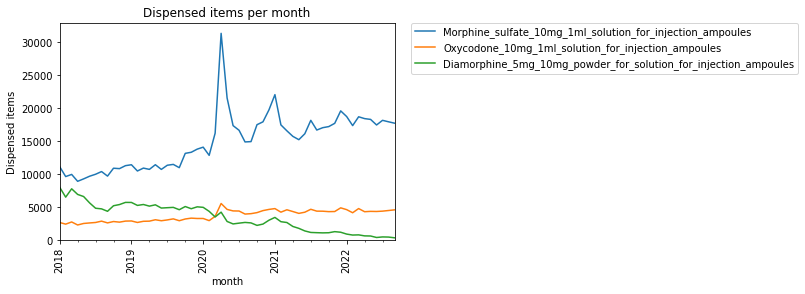

In [37]:
OP_DF[['month','Morphine_sulfate_10mg_1ml_solution_for_injection_ampoules', 'Oxycodone_10mg_1ml_solution_for_injection_ampoules', 'Diamorphine_5mg_10mg_powder_for_solution_for_injection_ampoules']].plot(x='month')
plt.title("Dispensed items per month");
plt.xticks(rotation=90);
plt.ylabel('Dispensed items');
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);
plt.ylim((0, OP_DF['Morphine_sulfate_10mg_1ml_solution_for_injection_ampoules'].max() * 1.05));

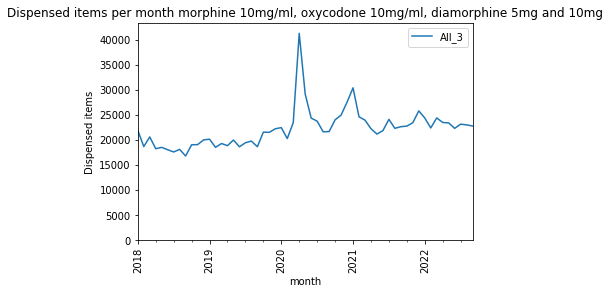

In [36]:
OP_DF[['month','All_3']].plot(x='month')
plt.title("Dispensed items per month morphine 10mg/ml, oxycodone 10mg/ml, diamorphine 5mg and 10mg");
plt.xticks(rotation=90);
plt.ylabel('Dispensed items');
plt.ylim((0, OP_DF['All_3'].max() * 1.05));

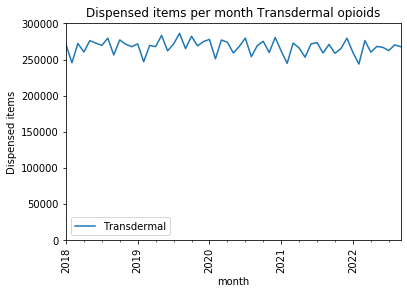

In [34]:
OP_TD_DF[['month','Transdermal']].plot(x='month')
plt.title("Dispensed items per month Transdermal opioids");
plt.xticks(rotation=90);
plt.ylabel('Dispensed items');
plt.ylim((0, OP_TD_DF['Transdermal'].max() * 1.05));